Training the model...
Model training complete!

Model Accuracy on test data: 96.94%


--- Classification Report ---

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.94      0.97      0.96        34
           4       1.00      1.00      1.00        46
           5       0.94      0.96      0.95        47
           6       0.97      0.97      0.97        35
           7       1.00      0.94      0.97        34
           8       0.97      0.93      0.95        30
           9       0.95      0.93      0.94        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



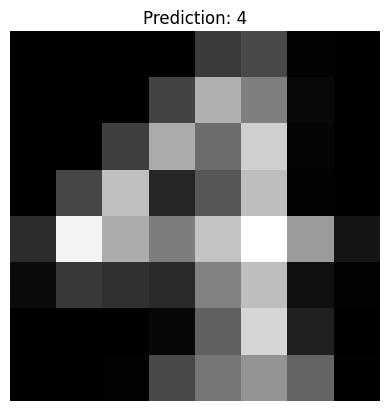

In [5]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
from PIL import Image

digits = load_digits()
X = digits.data
y = digits.target

X = X / 16.0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42)
print("Training the model...")
model.fit(X_train, y_train)
print("Model training complete!")

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy on test data: {accuracy * 100:.2f}%\n")
print("\n--- Classification Report ---\n")
print(classification_report(y_test, y_pred))

def predict_image(path):
    img = Image.open(path).convert('L').resize((8, 8))
    img = 255 - np.array(img)
    img = (img / 255.0) * 16.0
    sample = img.flatten().reshape(1, -1)
    pred = model.predict(sample)[0]
    plt.imshow(img, cmap='gray')
    plt.title(f"Prediction: {pred}")
    plt.axis('off')
    plt.show()

predict_image("download.jpg")

